In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<Axes: title={'center': 'Inference time for Wasm model'}, xlabel='timestamp[ns]'>

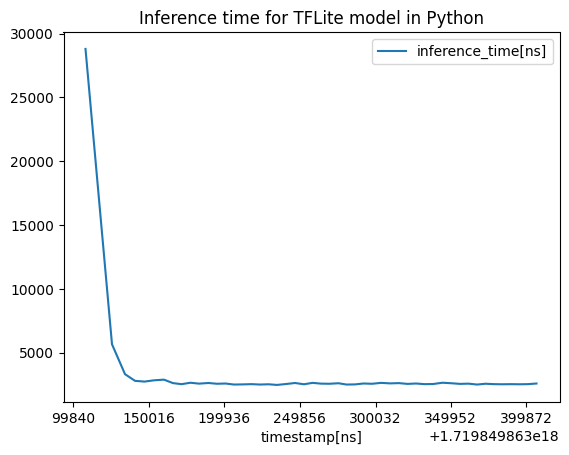

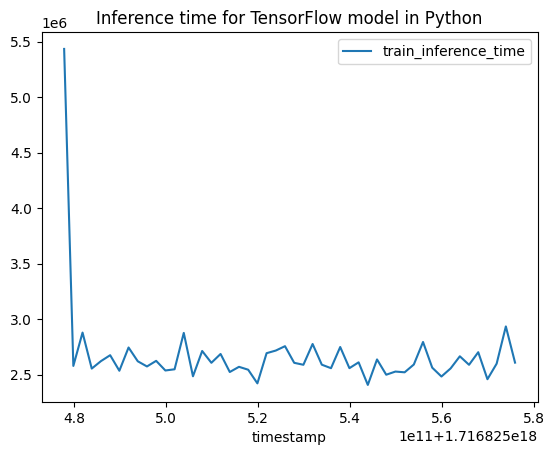

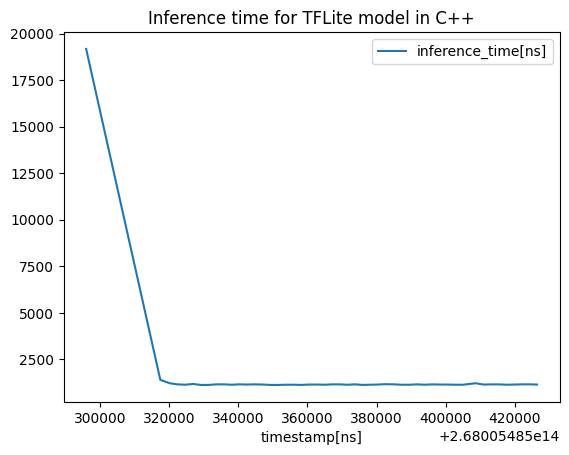

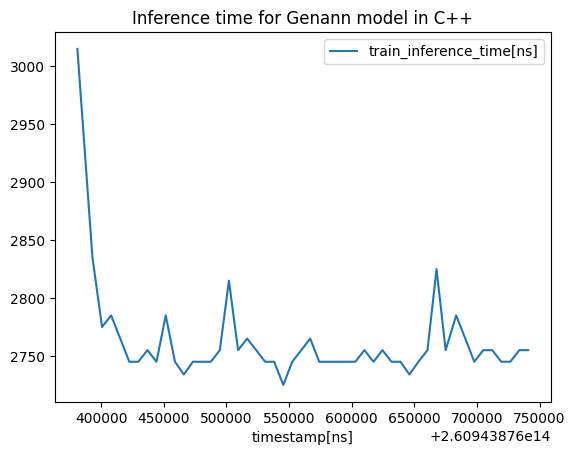

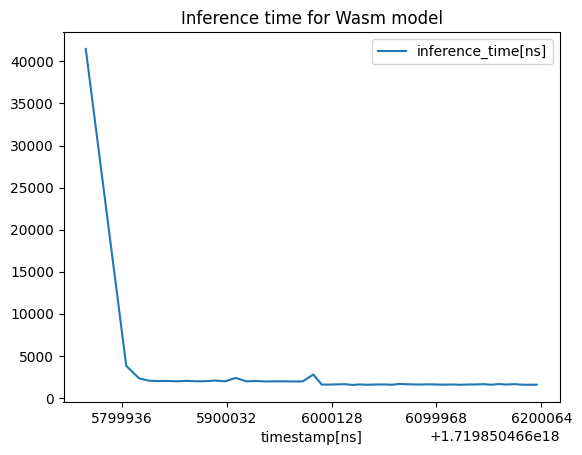

In [25]:
#inference time plot
df_inference_tflite_python = pd.read_csv("python_code/tflite_python_times.csv")
df_inference_python = pd.read_csv("python_code/python_times.csv")
df_inference_tflite_cpp = pd.read_csv("c_code/tensorflow_lite_c/tflite_times.csv")
df_inference_genann_cpp = pd.read_csv("c_code/genann_c/genann_times.csv")
df_inference_wasm = pd.read_csv("rust_code/syntetic_data_model/wasm_times.csv")

df_inference_tflite_python.plot(x='timestamp[ns]', y='inference_time[ns]', kind='line', title='Inference time for TFLite model in Python')
df_inference_python.plot(x='timestamp', y='train_inference_time', kind='line', title='Inference time for TensorFlow model in Python')
df_inference_tflite_cpp.plot(x='timestamp[ns]', y='inference_time[ns]', kind='line', title='Inference time for TFLite model in C++')
df_inference_genann_cpp.plot(x='timestamp[ns]', y='train_inference_time[ns]', kind='line', title='Inference time for Genann model in C++')
df_inference_wasm.plot(x='timestamp[ns]', y='inference_time[ns]', kind='line', title='Inference time for Wasm model')

In [26]:
df_inference_tflite_python = df_inference_tflite_python[10:]
df_inference_python = df_inference_python[10:]
df_inference_tflite_cpp = df_inference_tflite_cpp[10:]
df_inference_genann_cpp = df_inference_genann_cpp[10:]
df_inference_wasm = df_inference_wasm[10:]

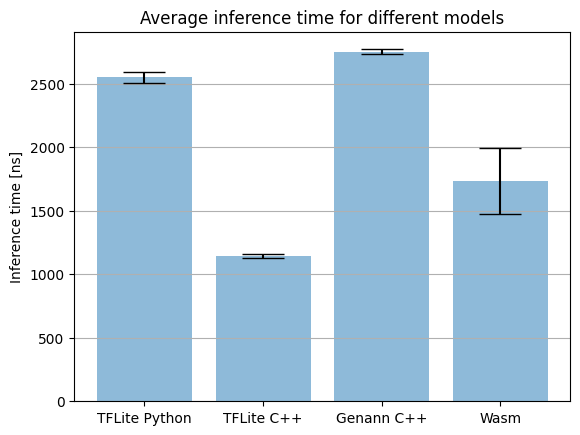

In [31]:
#jump the first 10 values


#average inference time
average_inference_tflite_python = df_inference_tflite_python['inference_time[ns]'].mean()
average_inference_python = df_inference_python['train_inference_time'].mean()
average_inference_tflite_cpp = df_inference_tflite_cpp['inference_time[ns]'].mean()
average_inference_genann_cpp = df_inference_genann_cpp['train_inference_time[ns]'].mean()
average_inference_wasm = df_inference_wasm['inference_time[ns]'].mean()

#standard deviation
std_inference_tflite_python = df_inference_tflite_python['inference_time[ns]'].std()
std_inference_python = df_inference_python['train_inference_time'].std()
std_inference_tflite_cpp = df_inference_tflite_cpp['inference_time[ns]'].std()
std_inference_genann_cpp = df_inference_genann_cpp['train_inference_time[ns]'].std()
std_inference_wasm = df_inference_wasm['inference_time[ns]'].std()

#plot bar chart
fig, ax = plt.subplots()
inference_times = [average_inference_tflite_python,  average_inference_tflite_cpp, average_inference_genann_cpp, average_inference_wasm]
std_inference_times = [std_inference_tflite_python,  std_inference_tflite_cpp, std_inference_genann_cpp, std_inference_wasm]
labels = ['TFLite Python', 'TFLite C++', 'Genann C++', 'Wasm']
x = np.arange(len(labels))
ax.bar(x, inference_times, yerr=std_inference_times, align='center', alpha=0.5, ecolor='black', capsize=15, color= "viridis")
ax.set_ylabel('Inference time [ns]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Average inference time for different models')
ax.yaxis.grid(True)
plt.show()

